In [10]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [11]:
df = pd.read_csv("Downloads/data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [13]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

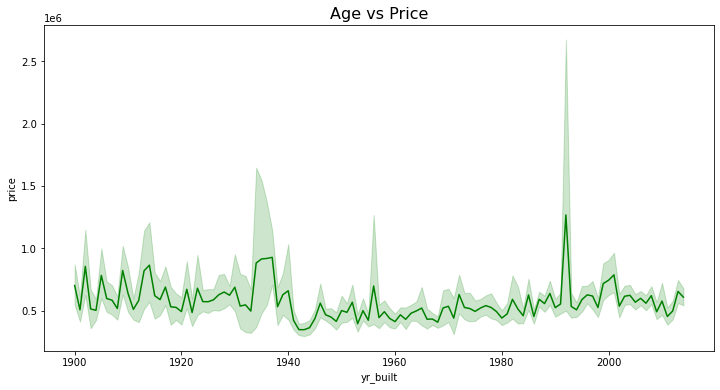

In [30]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title('Age vs Price',fontsize=16)
sns.lineplot(x="yr_built",y='price',data=df,color='green')
plt.show()

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['bedrooms','bathrooms','sqft_living','yr_built']],df.price)

In [15]:
reg.coef_

array([-66872.63456064,  75991.36221535,    266.46643466,  -2707.03811674])

In [16]:
reg.intercept_

5380114.294048335

In [17]:
reg.predict([[5,2,1500,1970]])

C:\Users\91985\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([264568.4076844])

In [18]:
-66872.63456064*5 + 75991.36221535 * 2 + 1500 * 266.46643466 + -2707.03811674 * 1970 + 5380114.294048335

264568.40768803563

In [20]:
bedrooms = int(input("Enter Number of Bedrooms : "))
bathrooms = int(input("Enter Number of Bathrooms : "))
sqft_living = int(input("Enter Area in sqft : "))
yrbuild = int(input("Enter year when it made : "))

Enter Number of Bedrooms : 4
Enter Number of Bathrooms : 2
Enter Area in sqft : 1200
Enter year when it made : 2010


In [21]:
price = reg.predict([[bedrooms,bathrooms,sqft_living,yrbuild]])
price

C:\Users\91985\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([143219.5871773])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x=df.drop(columns=['price','date','street','city','country','statezip'],axis=1)
y=df['price']

scaler=StandardScaler()
scaler.fit(x)
x_std=scaler.transform(x)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.2)

In [56]:
reg.fit(x_train,y_train)

LinearRegression()

In [57]:
reg.coef_

array([-5.57311674e+04,  4.25672839e+04, -1.01407339e+18, -2.56357884e+04,
        1.18291741e+04,  3.51977038e+04,  3.15280435e+04,  2.34287426e+04,
        9.07699690e+17,  4.88648083e+17, -6.70274543e+04,  5.68870577e+03])

In [58]:
y_pred = reg.predict(x_test)
y_pred

array([ 339919.48962488,  562791.48962488,  882855.48962488,
        755239.48962488,  308903.48962488,  482855.48962488,
        588527.48962488,  343847.48962488,  552423.48962488,
        615847.48962488, 1358119.48962488,  573607.48962488,
        643751.48962488,  672999.48962488,  646247.48962488,
        253175.48962488,  580455.48962488,  198951.48962488,
        256103.48962488,  560167.48962488,  443687.48962488,
       1055143.48962488,  407783.48962488,  325631.48962488,
        362919.48962488,  853095.48962488,  566119.48962488,
        680295.48962488,  315879.48962488,  542183.48962488,
        865319.48962488, 1085991.48962488,  421159.48962488,
        702119.48962488,  534119.48962488,  324187.48962488,
        950183.48962488,  862631.48962488,  685927.48962488,
        376295.48962488,  341159.48962488, 1572263.48962488,
        533511.48962488,  656359.48962488,  316647.48962488,
        770855.48962488, 1054631.48962488,  246183.48962488,
        313063.48962488,

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
mae = mean_absolute_error(y_test, y_pred)

In [61]:
mae

160251.80767571385